# Forest Cover Type Prediction - Internship Project

## Data Initialization

### Dependencies

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [27]:
pd.set_option('display.max_columns', None)

Merging two data

In [28]:
forestData = pd.read_csv('covtype.csv').drop(["ID"],axis=1)

Viewing Data

In [29]:
forestData.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


Shape

In [30]:
print(f"No. of rows: {forestData.shape[0]}")
print(f"No. of cols: {forestData.shape[1]}")

No. of rows: 596132
No. of cols: 55


Data Info

In [31]:
forestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596132 entries, 0 to 596131
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           596132 non-null  int64
 1   Aspect                              596132 non-null  int64
 2   Slope                               596132 non-null  int64
 3   Horizontal_Distance_To_Hydrology    596132 non-null  int64
 4   Vertical_Distance_To_Hydrology      596132 non-null  int64
 5   Horizontal_Distance_To_Roadways     596132 non-null  int64
 6   Hillshade_9am                       596132 non-null  int64
 7   Hillshade_Noon                      596132 non-null  int64
 8   Hillshade_3pm                       596132 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  596132 non-null  int64
 10  Wilderness_Area1                    596132 non-null  int64
 11  Wilderness_Area2                    596132 non-null 

In [32]:
forestData.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000,596132.000000
mean,2954.037879,155.682674,14.164522,268.357052,46.536990,2334.012289,212.160208,223.208306,142.339653,1968.392089,0.443514,0.050967,0.435664,0.069855,0.005680,0.013668,0.009704,0.022208,0.002956,0.012120,0.000176,0.000302,0.001941,0.058336,0.021499,0.050657,0.030039,0.001288,0.000005,0.004964,0.006767,0.003286,0.006822,0.015765,0.001433,0.056561,0.098148,0.036125,0.000797,0.004434,0.001847,0.001602,0.195490,0.051826,0.043611,0.089257,0.076778,0.002739,0.003343,0.000216,0.000557,0.027345,0.024261,0.015448,2.100892
std,286.213696,111.867752,7.523713,212.590510,58.376281,1556.966114,26.872779,19.863134,38.504181,1321.038719,0.496800,0.219930,0.495844,0.254903,0.075151,0.116109,0.098031,0.147360,0.054286,0.109421,0.013270,0.017374,0.044012,0.234378,0.145039,0.219296,0.170694,0.035870,0.002243,0.070278,0.081983,0.057231,0.082315,0.124565,0.037822,0.231003,0.297515,0.186600,0.028216,0.066437,0.042936,0.039993,0.396578,0.221675,0.204229,0.285115,0.266240,0.052267,0.057724,0.014709,0.023593,0.163086,0.153860,0.123326,1.447781
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2801.000000,59.000000,9.000000,108.000000,7.000000,1092.000000,198.000000,213.000000,119.000000,1015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2993.000000,127.000000,13.000000,218.000000,30.000000,1976.000000,218.000000,226.000000,143.000000,1698.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

Checking for any Null values

In [33]:
forestData.isna().any()

Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
Wilderness_Area1                      False
Wilderness_Area2                      False
Wilderness_Area3                      False
Wilderness_Area4                      False
Soil_Type1                            False
Soil_Type2                            False
Soil_Type3                            False
Soil_Type4                            False
Soil_Type5                            False
Soil_Type6                            False
Soil_Type7                            False
Soil_Type8                            False
Soil_Type9                      

Columns in the data

In [34]:
column = forestData.columns
column

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

**Note:** There are no null values hence theres no need to do data cleaning

# EDA

### Target Variable Analysis

- Plot histogram of the forest cover type distribution.

- Check for class imbalance.

[]

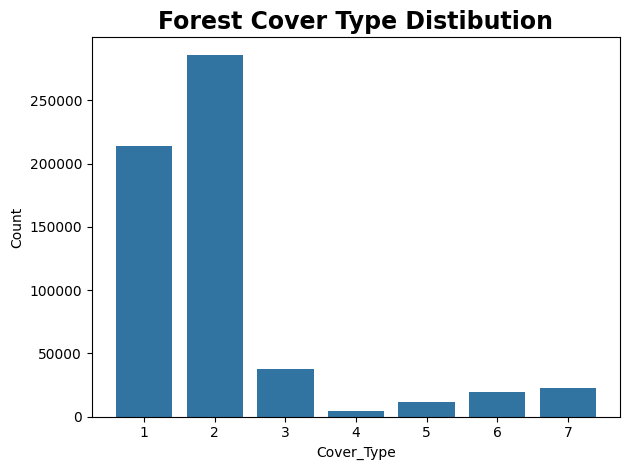

In [35]:

ax = sns.countplot(data=forestData,x='Cover_Type')
ax.set_xlabel('Cover_Type')
ax.set_ylabel('Count')
ax.set_title('Forest Cover Type Distibution',fontdict={'weight':'600','size':'17'})
plt.tight_layout()
plt.plot()

### Feature Distributions

Plot histograms for each necessary numerical feature

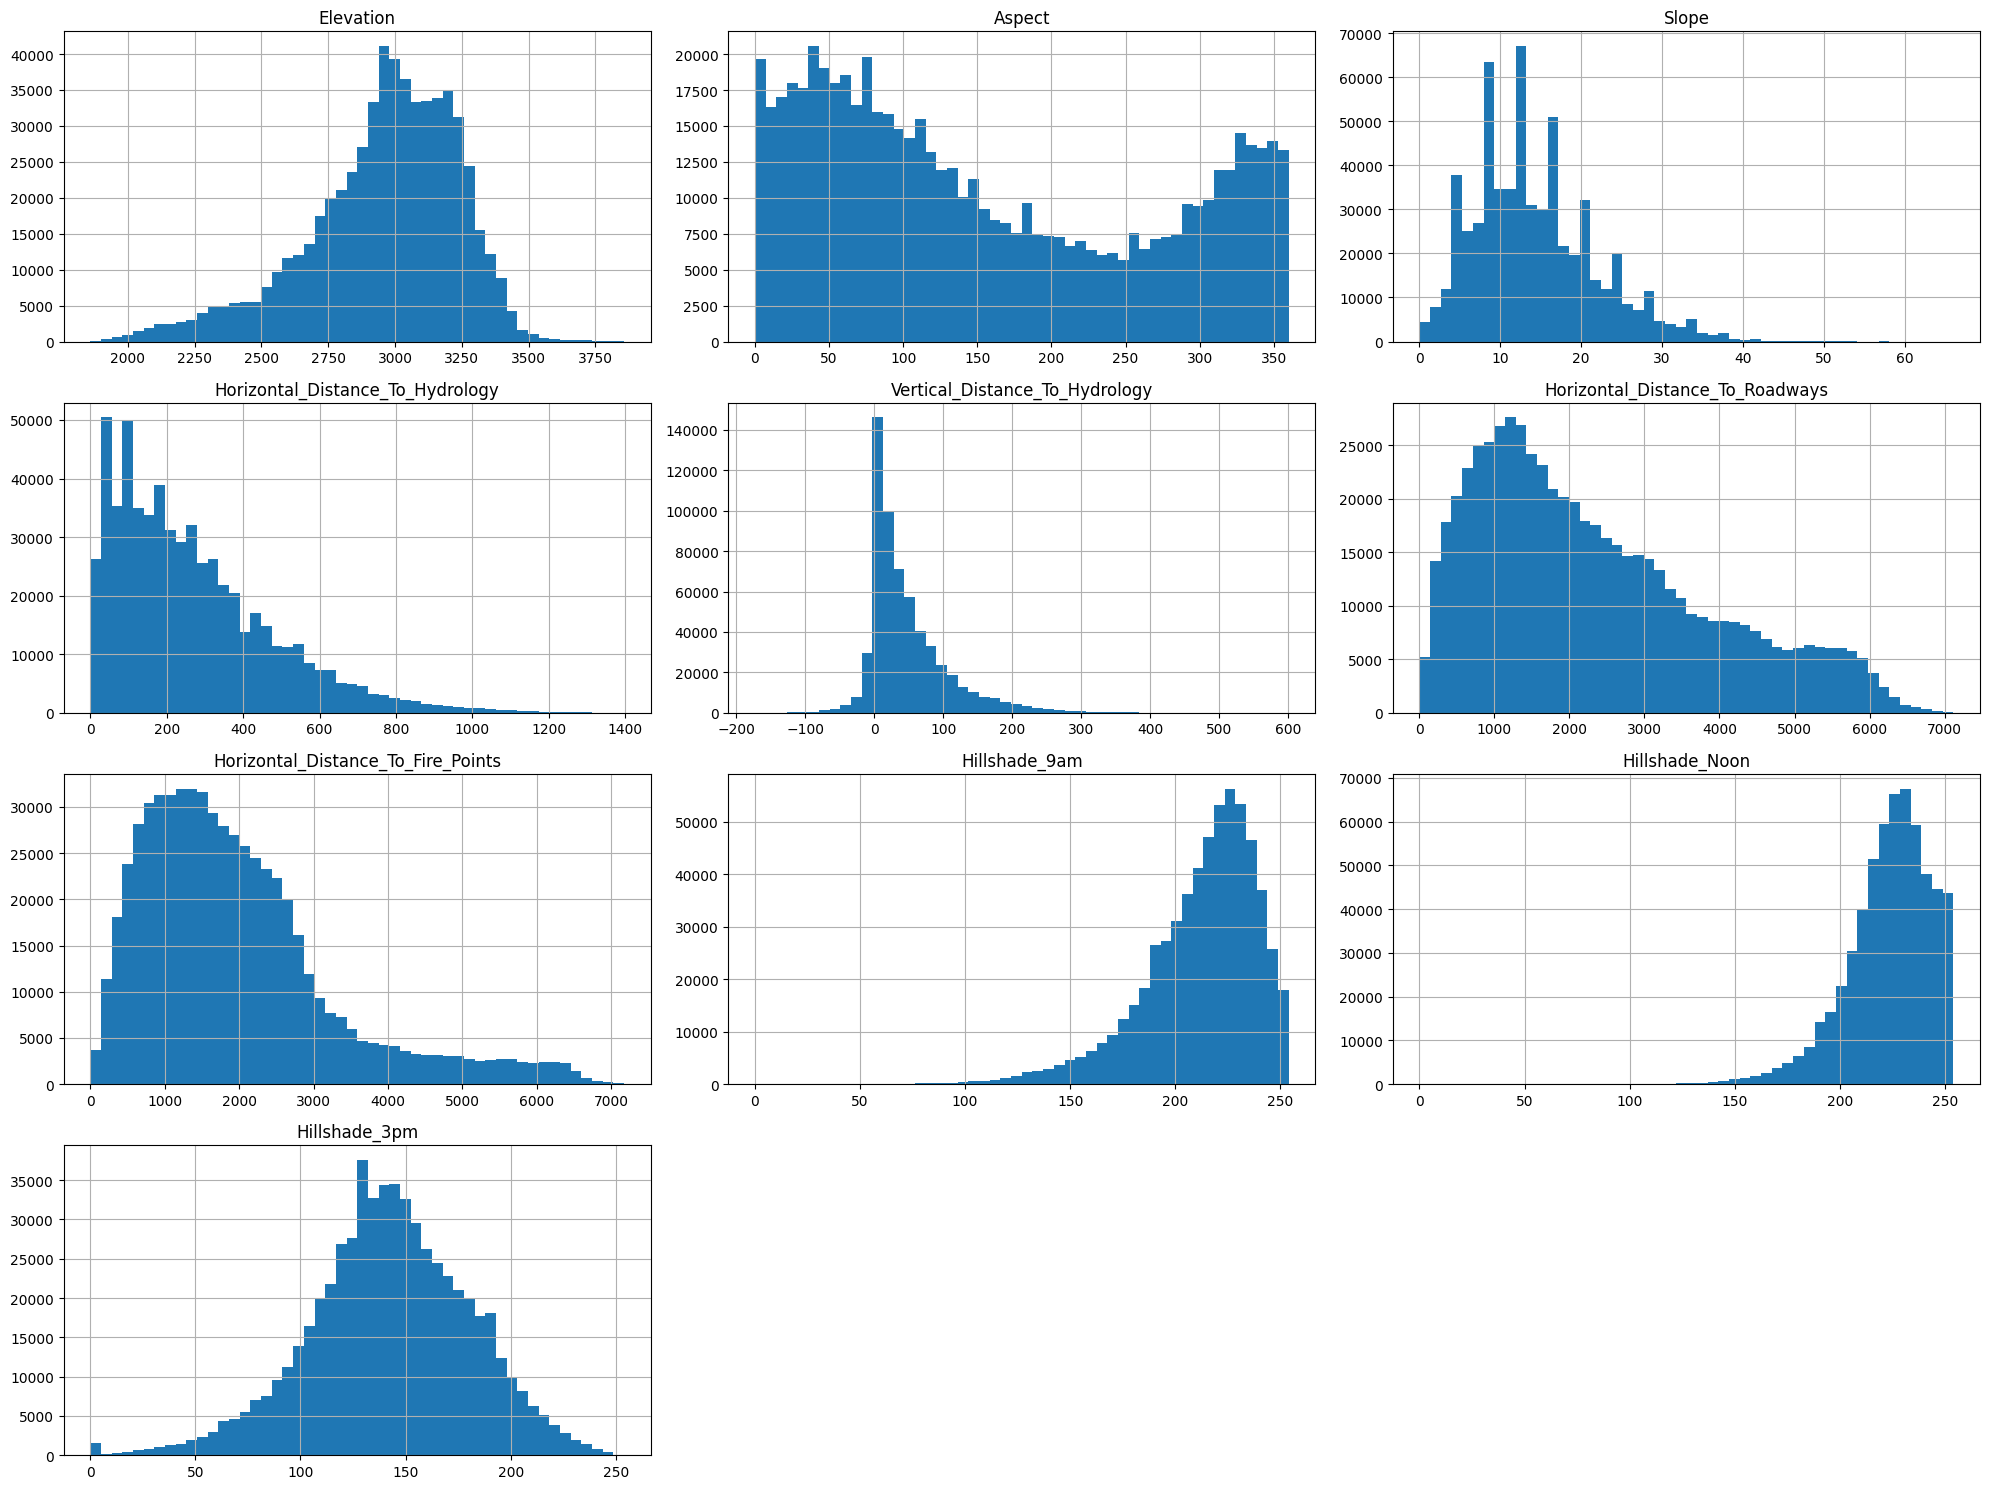

In [36]:
forestData[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
           'Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Hillshade_9am','Hillshade_Noon',
           'Hillshade_3pm']].hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

### Geospatial Relationships

🌍 Since this is geographical data, features like Horizontal_Distance_To_Roadways, Vertical_Distance_To_Hydrology, etc., may relate spatially.

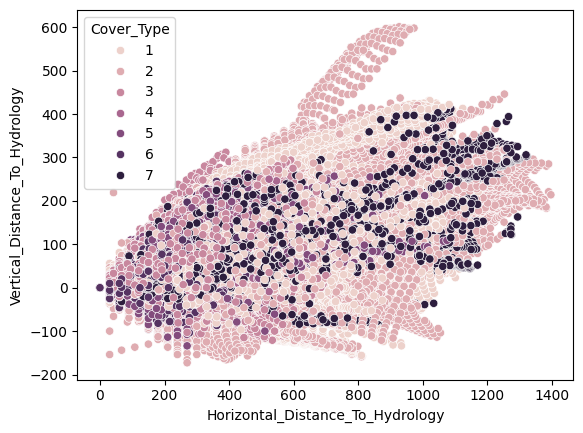

In [37]:
sns.scatterplot(x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', hue='Cover_Type', data=forestData)
plt.show()

### Wilderness Area vs Cover Type analysis

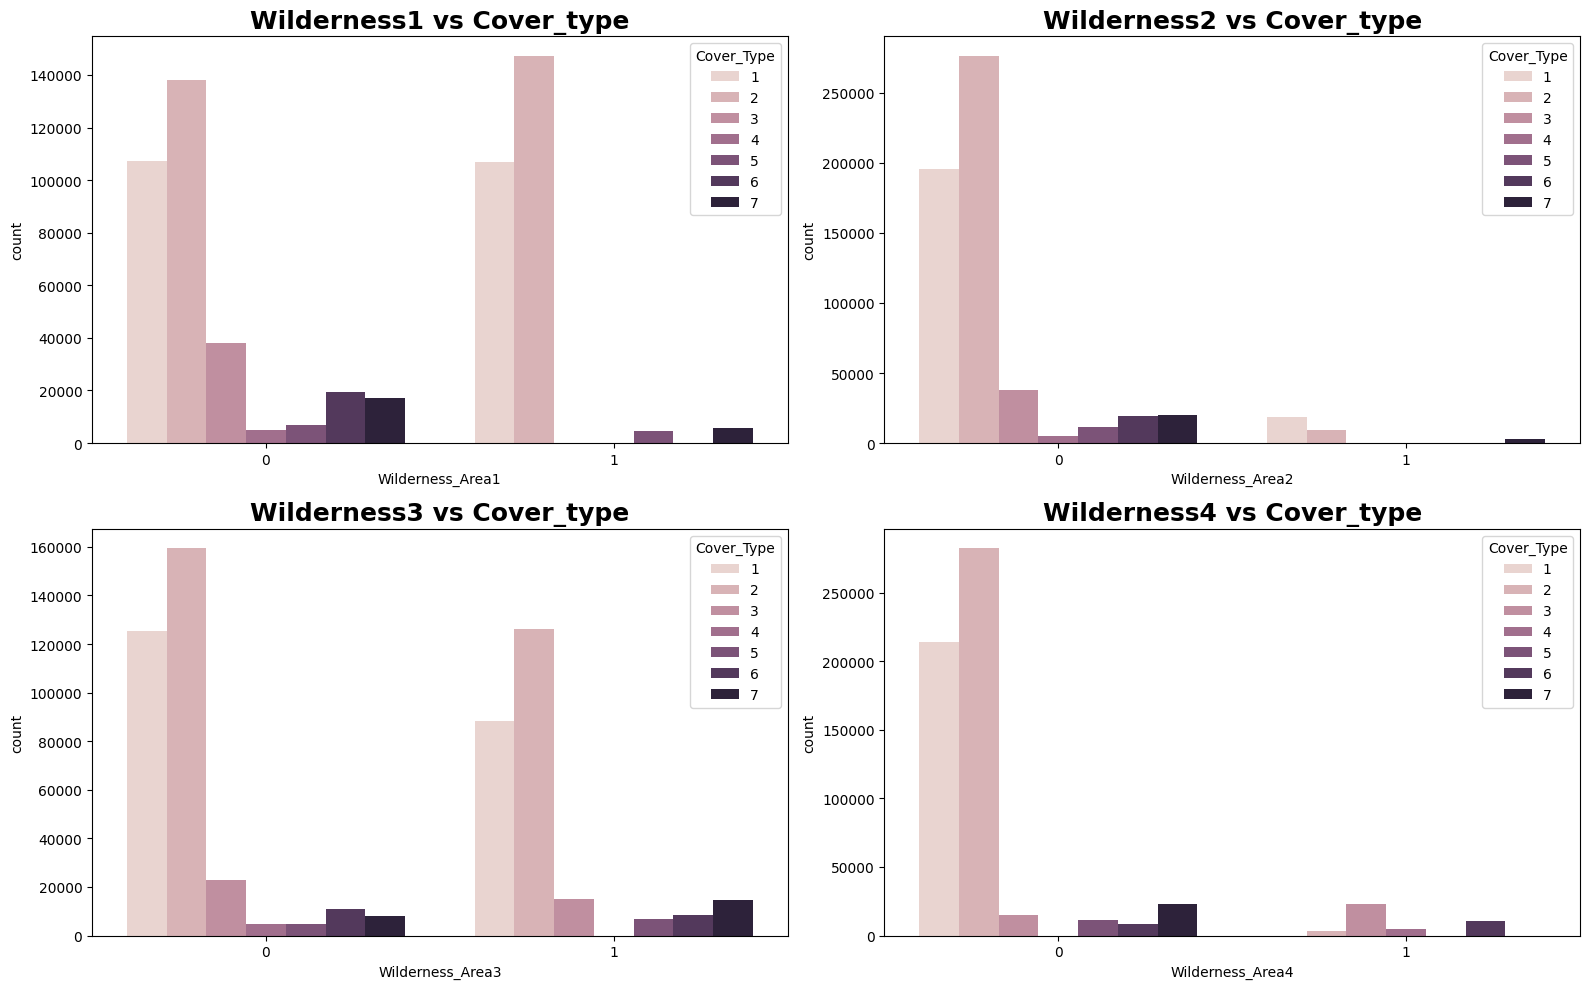

In [38]:
# make it for other wilderness area too
fig,axes = plt.subplots(2,2,figsize = (16,10))
ax1 = sns.countplot(x='Wilderness_Area1', hue='Cover_Type', data=forestData,ax=axes[0,0])
ax2 = sns.countplot(x='Wilderness_Area2', hue='Cover_Type', data=forestData,ax=axes[0,1])
ax3 = sns.countplot(x='Wilderness_Area3', hue='Cover_Type', data=forestData,ax=axes[1,0])
ax4 = sns.countplot(x='Wilderness_Area4', hue='Cover_Type', data=forestData,ax=axes[1,1])
ax1.set_title('Wilderness1 vs Cover_type',fontdict={'size':'18','weight':'600'})
ax2.set_title('Wilderness2 vs Cover_type',fontdict={'size':'18','weight':'600'})
ax3.set_title('Wilderness3 vs Cover_type',fontdict={'size':'18','weight':'600'})
ax4.set_title('Wilderness4 vs Cover_type',fontdict={'size':'18','weight':'600'})
plt.tight_layout()
plt.show()

### Soil Type vs Cover type relation

Check relationships between soil types and cover types

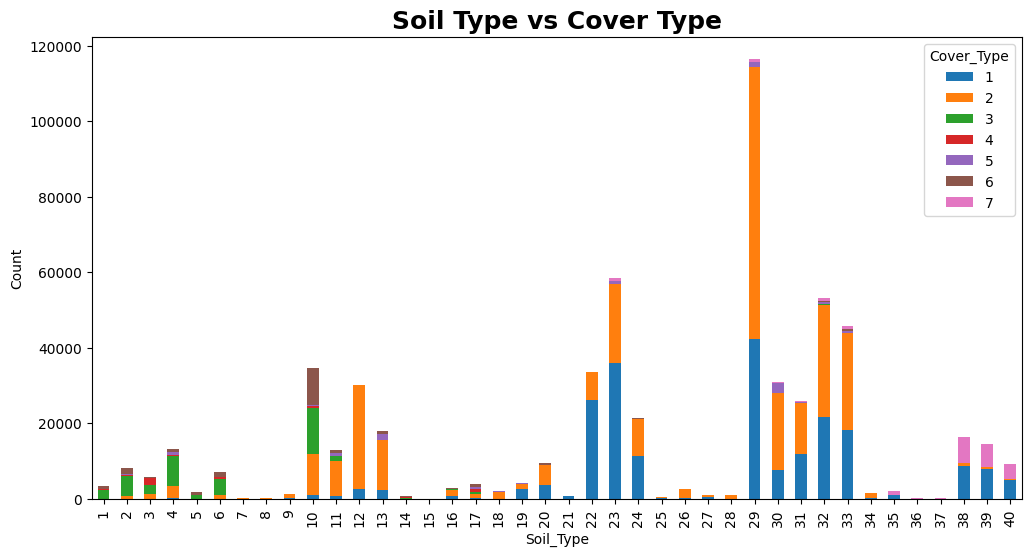

In [39]:

soil_cols = [f"Soil_Type{i}" for i in range(1,41)]
soil_onehot = forestData[soil_cols]

# get soil type label (e.g. 'Soil_Type7') then convert to integer 7
soil_type_series = soil_onehot.idxmax(axis=1).str.replace('Soil_Type', '').astype(int)

pd.crosstab(soil_type_series, forestData['Cover_Type']).plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('Soil_Type')
plt.ylabel('Count')
plt.title('Soil Type vs Cover Type',fontdict={'size':'18','weight':'600'})
plt.show()


# Data Preprocessing

__Note:__ Because we are going to use Tree based models theres no need of Scaling our data

In [40]:
X = forestData.drop(['Cover_Type'],axis=1)
y = forestData['Cover_Type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30)

# Model Selection

Random Forest Implementation

In [41]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


XGBoost Implementation

In [42]:
xgb = XGBClassifier()
xgb_ytrain = y_train.apply(lambda x: x-1)

xgb.fit(X_train,xgb_ytrain)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Model Evaluation

In [47]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,output_dict=True)
weighted_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Weighted F1 Score: {weighted_f1}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.96
Weighted F1 Score: 0.955195331162959

Classification Report:
 {'1': {'precision': 0.9640826625782548, 'recall': 0.9411021903499883, 'f1-score': 0.9524538304368063, 'support': 64145.0}, '2': {'precision': 0.9499880190326224, 'recall': 0.9721398379299876, 'f1-score': 0.9609362826853493, 'support': 85642.0}, '3': {'precision': 0.948023869238087, 'recall': 0.9625922023182297, 'f1-score': 0.9552524944446865, 'support': 11388.0}, '4': {'precision': 0.9449180327868852, 'recall': 0.9690652320107599, 'f1-score': 0.9568393094289509, 'support': 1487.0}, '5': {'precision': 0.9450657894736842, 'recall': 0.8407960199004975, 'f1-score': 0.8898869444014248, 'support': 3417.0}, '6': {'precision': 0.9398509273704282, 'recall': 0.9131020545638262, 'f1-score': 0.9262834201759631, 'support': 5938.0}, '7': {'precision': 0.9760765550239234, 'recall': 0.9567638868532904, 'f1-score': 0.966323736214936, 'support': 6823.0}, 'accuracy': 0.9553176023261015, 'macro avg': {'precision': 0.9525722650719

In [44]:
y_pred = xgb.predict(X_test)
xgb_ytest = y_test.apply(lambda x: x-1)
accuracy = accuracy_score(xgb_ytest, y_pred)
classification_rep = classification_report(xgb_ytest, y_pred,output_dict=True)
weighted_f1 = f1_score(xgb_ytest, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Weighted F1 Score: {weighted_f1}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.87
Weighted F1 Score: 0.8737411073859305

Classification Report:
 {'0': {'precision': 0.869184833210261, 'recall': 0.8441032036791644, 'f1-score': 0.8564604275579528, 'support': 64145.0}, '1': {'precision': 0.8701011876591621, 'recall': 0.9016370472431751, 'f1-score': 0.8855884579214166, 'support': 85642.0}, '2': {'precision': 0.8992234534508332, 'recall': 0.9049877063575694, 'f1-score': 0.9020963718324653, 'support': 11388.0}, '3': {'precision': 0.912258064516129, 'recall': 0.9509078681909886, 'f1-score': 0.931182087586434, 'support': 1487.0}, '4': {'precision': 0.8931077177053239, 'recall': 0.6333040678958151, 'f1-score': 0.7410958904109589, 'support': 3417.0}, '5': {'precision': 0.8475662567122814, 'recall': 0.8240148198046481, 'f1-score': 0.8356246264196056, 'support': 5938.0}, '6': {'precision': 0.9434248445320795, 'recall': 0.9116224534662172, 'f1-score': 0.9272510435301133, 'support': 6823.0}, 'accuracy': 0.8743010512189667, 'macro avg': {'precision': 0.8906951939694

### Dumping ML model and Metrics

In [45]:
import pickle

file = open("model.pkl","wb")
pickle.dump(rf_classifier,file)
file.close()

In [ ]:
import pickle
# Define forest cover type names
forestType = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
              'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

# Save evaluation metrics
evaluation_data = {
    'accuracy': accuracy,
    'weighted_f1': weighted_f1,
    'classification_report': classification_rep,
    'feature_names': X.columns.tolist(),
    'class_names': forestType
}

# Save evaluation data alongside model
with open('model_evaluation.pkl', 'wb') as file:
    pickle.dump(evaluation_data, file)

__Note:__ Random Forest perfomed best in this case